<a href="https://colab.research.google.com/github/ewattudo/datamanagement/blob/main/PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS 2 - Erick Watt-Udogu

# Setup, Import, Manipulation and Merge

## Setup Code

I was more deliberate about the setup code than normal. Instead of dumping old code and hoping from the best, now that I have done this for the third class it makes more sense.  

In [ ]:
#Using code from previous projects and Dr. Adam
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.patches as mpatches

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import missingno as msno

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

import pandas as pd
import urllib.request
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

!pip install geopandas==1.0.1
!pip install mapclassify
import geopandas as gpd

import time, webbrowser, zipfile

from google.colab import data_table
data_table.enable_dataframe_formatter()

import plotly.express as px
import plotly.graph_objects as go

!pip install ydata-profiling
from ydata_profiling import ProfileReport

from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

!pip install adjustText
from adjustText import adjust_text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=12a7631abe7269f235e4b13444d17a04fa4d611c612c1f5d8e3c143e7ef6d2d5
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


## Importing

### African-American Population by State and Over Time (HTML)

Source: Wikipedia https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population

In the wake of the murder of Michael Brown by Ferguson, Missouri police officer Darren Wilson, I have been fascinated with the question of African American geographic data. I was astonished that when the killing occurred in 2014, the majority-Black district did not have a single Black person in municipal leadership. This seemed odd to me, but upon further review, I noticed that states with the highest African American populations often did not have African Americans elected statewide. Furthermore, many of these states were in the southern United States—an area known to be politically conservative. This was interesting to me, and this data read helps me examine this data in greater detail.

### African American Prison Percentages by State (XLS)

Source: Prison Policy Initiative https://www.prisonpolicy.org/blog/2023/09/27/updated_race_data/

In theory, if a subsection of a population makes up 13% of the universe that population should make up 13% of the prison population, it should have a proportionate amount of political power, wealth, high school graduation, etc. But that is not the case for women, African Americans, and other minoritized groups. That is well known, but what is less well known is the degree to which that differs. This project is the first step to uncovering those differences.

This dataset pulled from the Prison Policy Initiative helps me to interrogate the difference between African American population rates and the prison population rates for that same community. This is prison data pulled in 2021.

In [ ]:
aaprison = pd.read_excel('https://www.prisonpolicy.org/data/race_bystate_2021.xlsx', sheet_name='Percentages', skiprows=3, usecols='A,G')
aaprison.head(5)

,State,Black (non-Hispanic)
0,Alabama,0.533437
1,Alaska,0.100237
2,Arizona,0.149997
3,Arkansas,0.397779
4,California,0.283022


In [ ]:
#Looks good. I only imported what was necessary, so this was easy.
aaprison.dtypes

,0
State,object
Black (non-Hispanic),float64


## Manipulating Data: Before Merging

### Manipulating African American Population Data

**Making the Numerical Data Calculatable**

When I imported this data, the numbers were saved as text, so I wouldn't be able to analyze it. This code remedies that.

In [ ]:
aapop = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population',match="State/Territory")[0].head(65)
aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States of America,19.3%,18.9%,19.0%,18.4%,18.1%,16.8%,15.7%,14.1%,12.7%,...,9.7%,9.8%,10.0%,10.5%,11.1%,11.7%,12.1%,12.9%,13.6%,14.2%
1,Alabama,NaN,41.4%,29.0%,33.2%,38.5%,43.3%,44.7%,45.4%,47.7%,...,35.7%,34.7%,32.0%,30.0%,26.2%,25.6%,25.3%,26.0%,26.3%,26.8%
2,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2%,0.2%,NaN,3.0%,3.0%,3.4%,4.1%,4.3%,4.7%,4.8%
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02%,0.04%,0.02%,NaN
4,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3%,0.3%,...,2.5%,3.0%,3.5%,3.3%,3.0%,2.8%,3.0%,3.6%,5.0%,6.2%


In [ ]:
#All objects. I am going to have to turn all these into numbers.
aapop.dtypes

,0
State/Territory,object
1790,object
1800,object
1810,object
1820,object
1830,object
1840,object
1850,object
1860,object
1870,object


In [ ]:
#I wasn't planning on updating all the years, but the AI made it easy. It seems to anticipate that I wanted to change it.
aapop['1790'] = aapop['1790'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1800'] = aapop['1800'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1810'] = aapop['1810'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1820'] = aapop['1820'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1830'] = aapop['1830'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1840'] = aapop['1840'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1850'] = aapop['1850'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1860'] = aapop['1860'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1870'] = aapop['1870'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1880'] = aapop['1880'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1890'] = aapop['1890'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1900'] = aapop['1900'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1910'] = aapop['1910'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1920'] = aapop['1920'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1930'] = aapop['1930'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1940'] = aapop['1940'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1950'] = aapop['1950'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1960'] = aapop['1960'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1970'] = aapop['1970'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1980'] = aapop['1980'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1990'] = aapop['1990'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2000'] = aapop['2000'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2010'] = aapop['2010'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2020'] = aapop['2020'].str.replace('[\%]', '', regex=True).astype(float)

In [ ]:
#This looks right.
aapop.describe()

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
count,19.000000,26.000000,29.000000,30.000000,31.000000,32.000000,38.000000,45.000000,49.000000,49.000000,...,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,56.000000,57.000000,57.000000,53.000000
mean,15.352632,16.534615,18.372414,17.683333,19.345161,18.687500,15.992105,13.171111,12.526531,12.571429,...,9.496154,9.253846,9.374510,9.728846,10.021154,10.365385,11.315536,12.007193,12.637018,12.771698
std,14.957806,15.993872,17.620299,17.930807,19.389737,19.595008,18.826640,18.269306,18.141318,18.416354,...,13.434999,12.874621,11.839068,11.991375,12.524444,12.395586,14.720913,14.392811,13.805798,10.193218
min,0.300000,0.400000,0.300000,0.300000,0.200000,0.200000,0.000000,0.000000,0.100000,0.200000,...,0.100000,0.000000,0.000000,0.100000,0.200000,0.200000,0.020000,0.040000,0.020000,1.200000
25%,2.350000,2.950000,2.900000,2.200000,1.650000,1.075000,0.600000,0.300000,0.600000,0.500000,...,0.400000,0.400000,0.850000,1.525000,1.750000,1.800000,2.150000,2.500000,2.900000,5.000000
50%,9.500000,8.900000,13.000000,11.900000,15.500000,12.600000,3.700000,1.600000,1.800000,1.900000,...,3.400000,3.600000,4.400000,5.200000,6.350000,6.900000,6.850000,7.500000,8.700000,9.700000
75%,24.200000,30.150000,32.200000,32.700000,35.400000,33.125000,27.275000,24.900000,22.500000,22.500000,...,13.950000,13.725000,13.200000,12.700000,13.175000,14.025000,15.075000,15.600000,16.100000,17.200000
max,43.700000,44.600000,55.200000,52.800000,58.500000,56.400000,58.900000,58.600000,58.900000,60.700000,...,50.200000,49.200000,45.300000,53.900000,71.100000,70.300000,76.620000,76.190000,76.030000,44.200000


<Axes: >

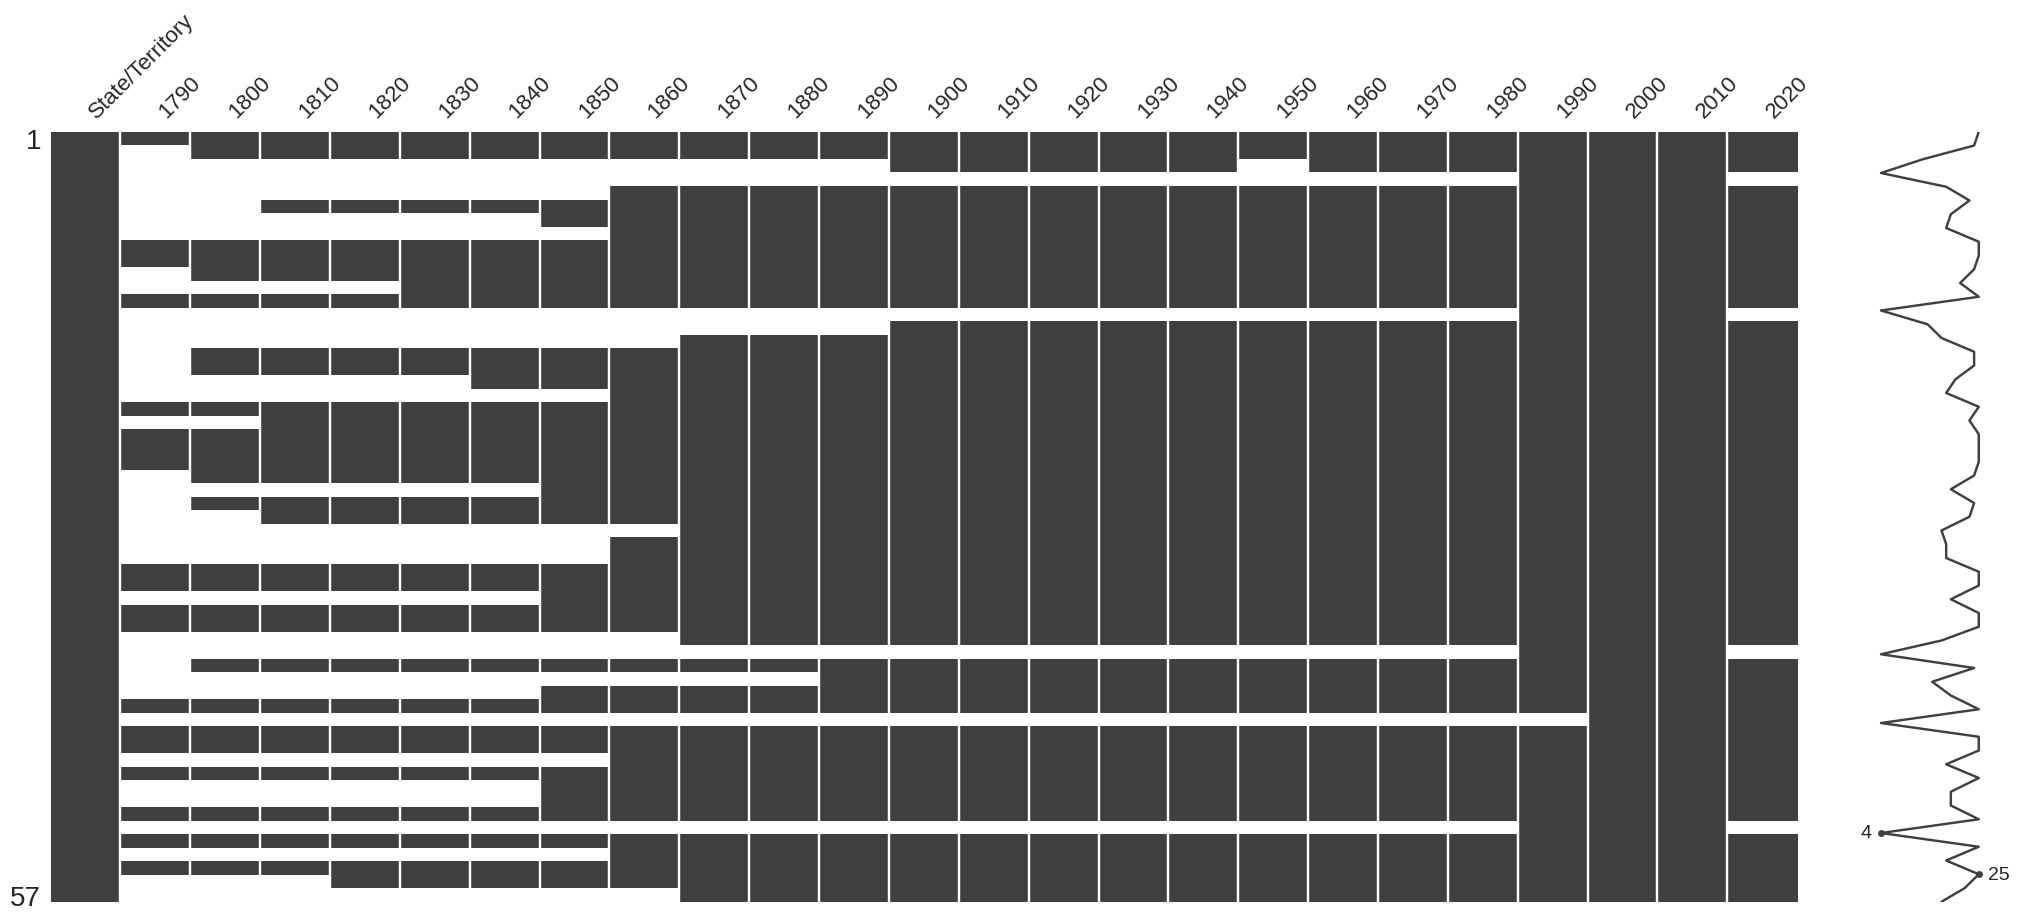

In [ ]:
#I want to see the missing data. This all makes sense. I hypothesize that the missing data is related to when statehood was granted. I think I might just pull 2010 and 2020
msno.matrix(aapop)

**Slicing African African American Population Data**

I sliced this data in three ways:

1.   Removed all the states and kept the aggregate country data with all the time data intact.
2.   Removed the country data and kept the disaggregated states and territory data over time.
4. Created a darta frame that only included states, territories and population data for 2020.




***US African American Population Data Manipulation***

In [ ]:
#I want just United States aapop
usaapop = aapop[aapop['State/Territory'] == 'United States of America']

In [ ]:
#I want to create a line graph so of USAAPOP so I need to stack it
usaapop = usaapop.melt(id_vars=['State/Territory'], var_name='Year', value_name='Percentage')

In [ ]:
usaapop.head(5)

,State/Territory,Year,Percentage
0,United States of America,1790,19.3
1,United States of America,1800,18.9
2,United States of America,1810,19.0
3,United States of America,1820,18.4
4,United States of America,1830,18.1


***African American Population by State Data Slice and Manipulation***

In [ ]:
# In aapop I want to remove United States, it is the aggregate
aapop = aapop[aapop['State/Territory'] != 'United States of America']

***2020 African American Population Data Slice for Merge***

This slice is designed for me to merge with prison population and US shapefiles. In the future, I want to use this to merge wit ha number of other variables.

In [ ]:
#I need the aapop data to include just state and 2020.
aapop2020 = simpleaapop[['State/Territory', '2020']]
aapop2020.head()

,State/Territory,2020
1,Alabama,26.8
2,Alaska,4.8
3,American Samoa,NaN
4,Arizona,6.2
5,Arkansas,16.5


In [ ]:
#I need to get aapop2020 ready to merge. I want to rename State/Terrirory to State and 2020 to Pop.
aapop2020 = aapop2020.rename(columns={'State/Territory': 'State', '2020': 'Pop'})
aapop2020.head()

,State,Pop
1,Alabama,26.8
2,Alaska,4.8
3,American Samoa,NaN
4,Arizona,6.2
5,Arkansas,16.5


### Manipulating African American Prison Population Data

**Limitation:** This dataset includes state prison population for 50 states and excludes Washington DC and territories. Washington DC is not a state and therefor doesn't have state prisons. Later we wil see that the prison population in Maryland is abnormally high, perhaps its high Black population and proximity to DC contributes to the large difference. This is an area for further study.

In [ ]:
#Only 50 observations, so probably no DC and definitely no territories. DC is a loss since it has such a high Black population. Territories, not so much.
aaprison.describe()

,Black (non-Hispanic)
count,50.000000
mean,0.317464
std,0.198303
min,0.026895
25%,0.117305
50%,0.297669
75%,0.488053
max,0.709000


## Merging Data Sets

### Merge African American Population with African American Prison Data

In [ ]:
#I want to rename Black (non-Hispanic) in aaprison to Prison
aaprisonmerge = aaprison.rename(columns={'Black (non-Hispanic)': 'Prison'})
aaprisonmerge.head()

,State,Prison
0,Alabama,0.533437
1,Alaska,0.100237
2,Arizona,0.149997
3,Arkansas,0.397779
4,California,0.283022


In [ ]:
#I want to merge aaprisonmerge and aapop2020 on outer with State as the common field.
aapopprison = pd.merge(aaprisonmerge, aapop2020, on='State', how='outer',indicator=True)
aapopprison.head(5)

,State,Prison,Pop,_merge
0,Alabama,0.533437,26.8,both
1,Alaska,0.100237,4.8,both
2,American Samoa,NaN,NaN,right_only
3,Arizona,0.149997,6.2,both
4,Arkansas,0.397779,16.5,both


## Manipulating Data: After Merging

### General Cleaning

In [ ]:
#Prison aapopprison needs to be multiplied by 100 and rounded to one decimal place.
aapopprison['Prison'] = aapopprison['Prison'] * 100
aapopprison['Prison'] = aapopprison['Prison'].round(1)
aapopprison.head(5)

,State,Prison,Pop,_merge
0,Alabama,53.3,26.8,both
1,Alaska,10.0,4.8,both
2,American Samoa,NaN,NaN,right_only
3,Arizona,15.0,6.2,both
4,Arkansas,39.8,16.5,both


In [ ]:
#I need to remove all 0 and Nan values from aapropprison Pop and Prison columns. THese will be terriroties and DC. The territories are not an issue for the purpose of the study but DC is.
aapopprison = aapopprison.dropna(subset=['Pop', 'Prison'])

### Creating New Calculated Fields to Compare Population and Prison Percentage Variables

I want to measure the difference between Back population in a state and the prison population. I created two fields to help:

1.  Difference = African American Prison Population - Population of the State
2.  Prison/Pop = African American Prison Population / Population of the State

In theory if 5% of a state's population is Black so too should it's prison population be 5% but in every one of the 50 states, the Black prison population exceeds its expected proportion. "Difference" calculates the difference between these two numbers and to help measure distance from the expected value and "Prison/Pop" measures the percentages relative to one another.


In [ ]:
#In aapopprison I want to add a column that subtracts Pop from Prison and another that divides prison over pop
aapopprison['Difference'] = aapopprison['Prison'] - aapopprison['Pop'].round(2)
aapopprison['Prison/Pop'] = aapopprison['Prison'] / aapopprison['Pop'].round(2)
aapopprison.head(5)

,State,Prison,Pop,_merge,Difference,Prison/Pop
0,Alabama,53.3,26.8,both,26.5,1.988806
1,Alaska,10.0,4.8,both,5.2,2.083333
2,American Samoa,NaN,NaN,right_only,NaN,NaN
3,Arizona,15.0,6.2,both,8.8,2.419355
4,Arkansas,39.8,16.5,both,23.3,2.412121


In [ ]:
aapopprison.describe().round(2)

,Prison,Pop,Difference,Prison/Pop
count,50.00,50.00,50.00,50.00
mean,31.75,12.02,19.73,2.90
std,19.83,9.44,11.90,0.83
min,2.70,1.20,1.30,1.41
25%,11.72,4.85,8.45,2.33
50%,29.75,9.60,19.90,2.75
75%,48.80,16.25,29.33,3.30
max,70.90,37.90,46.10,5.27


# Analysis

## US African American Population Percentage Over Time

This data is interesting. After I controlled for the US, it is interesting to relationship between time and African American population percentage is quadratic. I did not know that before running this data. I thought the percentage was in a steady decline, especially with increased immigration, but that is not the case.

In [ ]:
fig = px.line(usaapop, x="Year", y="Percentage")
fig.show()

## Comparing Distributions of African American Population and Prison Population

The percentage of Black people in the United states in 2020 was 13% but the mean of the Black population incarcerated in 2021 was nearly three times that. Another number that is astonishing is that there is a state with a Black prison population of more than 70%, but the violin plot shows that there are five states with prison populations of more than 60%. The 75th percentile is almost 50%.

When I list the states with prison populations greater than 60% I was surprised to see the political left leaning states including New Jersey, Delaware and Maryland.

In [ ]:
aapopprison_melted = aapopprison[["Pop", "Prison"]].melt(var_name="Category", value_name="Value")
fig = px.violin(aapopprison_melted, x="Category", y="Value", box=True, points='all')
fig.show()

In [ ]:
#I want to know the correlation coefficient in aapopprison of Prison and Pop
aapopprison['Prison'].corr(aapopprison['Pop'])

0.9103411904187235

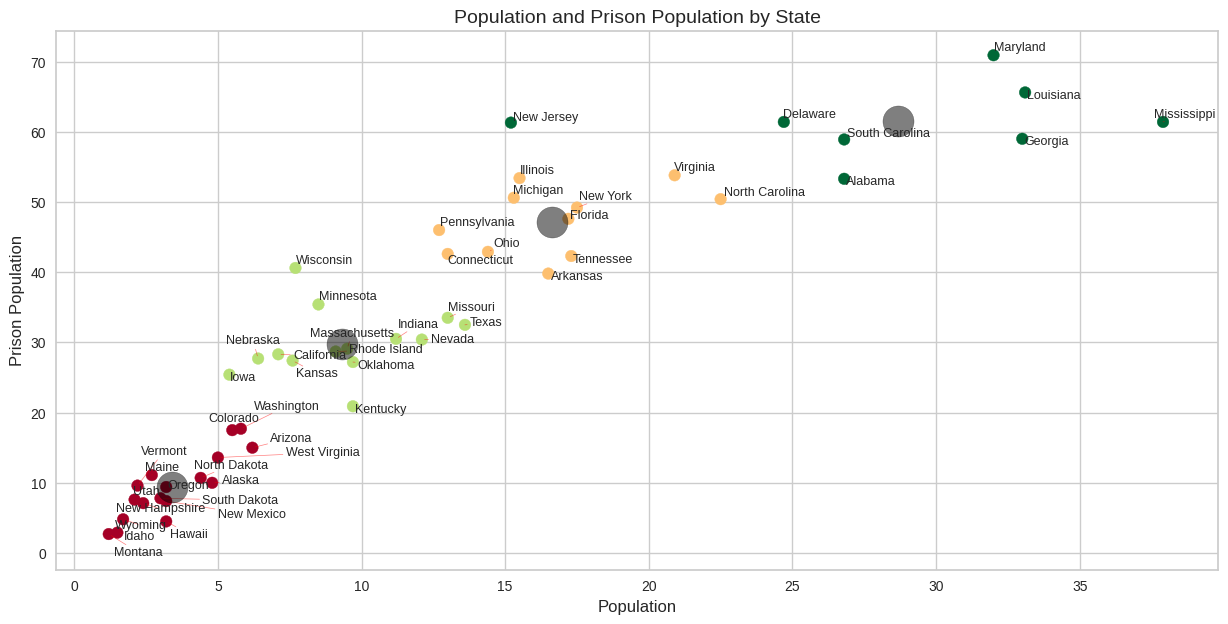

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(aapopprison[['Pop', 'Prison']])
y_kmeans = kmeans.predict(aapopprison[['Pop', 'Prison']])

fig, ax = plt.subplots(figsize=(15, 7))

ax.scatter(aapopprison.Pop, aapopprison.Prison, c=y_kmeans, s=70, cmap='RdYlGn')

texts = [ax.text(row['Pop'], row['Prison'], row['State'], fontsize=9) for idx, row in aapopprison.iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5)

ax.set_xlabel("Population", fontsize=12)
ax.set_ylabel("Prison Population", fontsize=12)
ax.set_title("Population and Prison Population by State", fontsize=14)
plt.show()

In [ ]:
#I want to know the correlation coefficient in aapopprison of Prison and Difference
aapopprison['Difference'].corr(aapopprison['Pop'])

0.7241832628639248

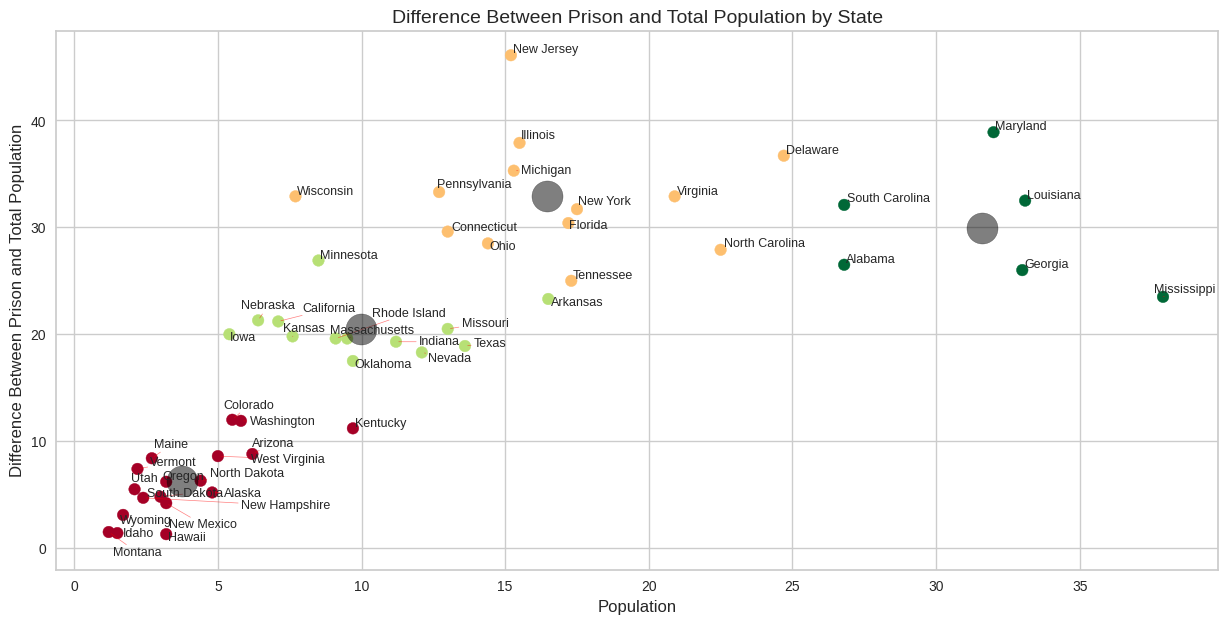

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(aapopprison[['Pop', 'Difference']])
y_kmeans = kmeans.predict(aapopprison[['Pop', 'Difference']])

fig, ax = plt.subplots(figsize=(15, 7))

ax.scatter(aapopprison.Pop, aapopprison.Difference, c=y_kmeans, s=70, cmap='RdYlGn')

texts = [ax.text(row['Pop'], row['Difference'], row['State'], fontsize=9) for idx, row in aapopprison.iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5)

ax.set_xlabel("Population", fontsize=12)
ax.set_ylabel("Difference Between Prison and Total Population", fontsize=12)
ax.set_title("Difference Between Prison and Total Population by State", fontsize=14)
plt.show()

In [ ]:
#I want to know the correlation coefficient in aapopprison of Prison and Difference
aapopprison['Prison/Pop'].corr(aapopprison['Pop'])

-0.3990110709678996

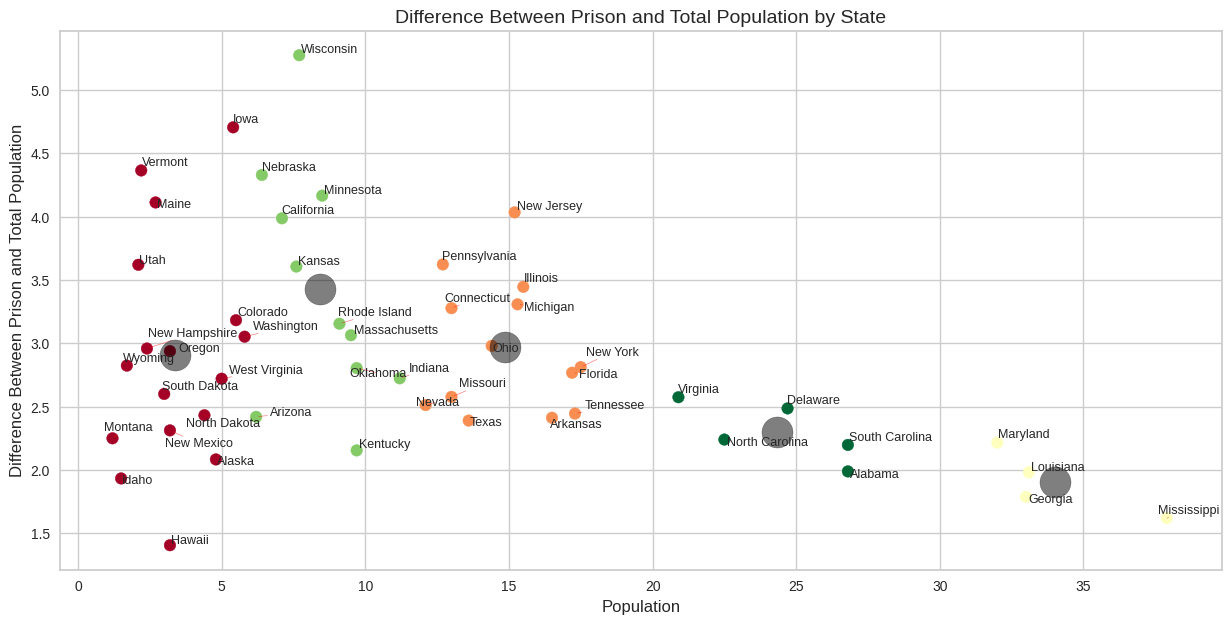

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(aapopprison[['Pop', 'Prison/Pop']])
y_kmeans = kmeans.predict(aapopprison[['Pop', 'Prison/Pop']])

fig, ax = plt.subplots(figsize=(15, 7))

# Referencing 'Pop' and 'Prison' as columns of the DataFrame
ax.scatter(aapopprison['Pop'], aapopprison['Prison']/aapopprison['Pop'], c=y_kmeans, s=70, cmap='RdYlGn')

# Referencing 'Pop', 'Prison', and 'State' as columns within the list comprehension
texts = [ax.text(row['Pop'], row['Prison']/row['Pop'], row['State'], fontsize=9) for idx, row in aapopprison.iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5)

ax.set_xlabel("Population", fontsize=12)
ax.set_ylabel("Difference Between Prison and Total Population", fontsize=12) # This label may need to be updated to reflect the ratio being plotted
ax.set_title("Difference Between Prison and Total Population by State", fontsize=14)  # This title may also need to be updated
plt.show()

In [ ]:
#I am going to map the states to Census designated regions https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States
region_mapping = {
    "Connecticut": "Northeast", "Maine": "Northeast", "Massachusetts": "Northeast",
    "New Hampshire": "Northeast", "Rhode Island": "Northeast", "Vermont": "Northeast",
    "New Jersey": "Northeast", "New York": "Northeast", "Pennsylvania": "Northeast",

    "Illinois": "Midwest", "Indiana": "Midwest", "Michigan": "Midwest",
    "Ohio": "Midwest", "Wisconsin": "Midwest", "Iowa": "Midwest",
    "Kansas": "Midwest", "Minnesota": "Midwest", "Missouri": "Midwest",
    "Nebraska": "Midwest", "North Dakota": "Midwest", "South Dakota": "Midwest",

    "Delaware": "South", "District of Columbia": "South", "Florida": "South",
    "Georgia": "South", "Maryland": "South", "North Carolina": "South",
    "South Carolina": "South", "Virginia": "South", "West Virginia": "South",
    "Alabama": "South", "Kentucky": "South", "Mississippi": "South",
    "Tennessee": "South", "Arkansas": "South", "Louisiana": "South",
    "Oklahoma": "South", "Texas": "South",

    "Arizona": "West", "Colorado": "West", "Idaho": "West",
    "Montana": "West", "Nevada": "West", "New Mexico": "West",
    "Utah": "West", "Wyoming": "West", "Alaska": "West",
    "California": "West", "Hawaii": "West", "Oregon": "West",
    "Washington": "West"
}
aapopprison["Region"] = aapopprison["State"].map(region_mapping)

In [ ]:
#I am going to map the states to Census designated divisions https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States
#AI made this mapping easy, it was only partially manual.
division_mapping = {
    "Connecticut": "New England", "Maine": "New England", "Massachusetts": "New England",
    "New Hampshire": "New England", "Rhode Island": "New England", "Vermont": "New England",

    "New Jersey": "Middle Atlantic", "New York": "Middle Atlantic", "Pennsylvania": "Middle Atlantic",

    "Illinois": "East North Central", "Indiana": "East North Central", "Michigan": "East North Central",
    "Ohio": "East North Central", "Wisconsin": "East North Central",

    "Iowa": "West North Central", "Kansas": "West North Central", "Minnesota": "West North Central",
    "Missouri": "West North Central", "Nebraska": "West North Central",
    "North Dakota": "West North Central", "South Dakota": "West North Central",

    "Delaware": "South Atlantic", "District of Columbia": "South Atlantic", "Florida": "South Atlantic",
    "Georgia": "South Atlantic", "Maryland": "South Atlantic",
    "North Carolina": "South Atlantic", "South Carolina": "South Atlantic",
    "Virginia": "South Atlantic", "West Virginia": "South Atlantic",

    "Alabama": "East South Central", "Kentucky": "East South Central",
    "Mississippi": "East South Central", "Tennessee": "East South Central",

    "Arkansas": "West South Central", "Louisiana": "West South Central",
    "Oklahoma": "West South Central", "Texas": "West South Central",

    "Arizona": "Mountain", "Colorado": "Mountain", "Idaho": "Mountain",
    "Montana": "Mountain", "Nevada": "Mountain", "New Mexico": "Mountain",
    "Utah": "Mountain", "Wyoming": "Mountain",

    "Alaska": "Pacific", "California": "Pacific",
    "Hawaii": "Pacific", "Oregon": "Pacific", "Washington": "Pacific"
}

aapopprison["Division"] = aapopprison["State"].map(division_mapping)

In [ ]:
aapopprison.head(5)

,State,Prison,Pop,_merge,Difference,Prison/Pop,Region,Division
0,Alabama,53.3,26.8,both,26.5,1.988806,South,East South Central
1,Alaska,10.0,4.8,both,5.2,2.083333,West,Pacific
3,Arizona,15.0,6.2,both,8.8,2.419355,West,Mountain
4,Arkansas,39.8,16.5,both,23.3,2.412121,South,West South Central
5,California,28.3,7.1,both,21.2,3.985915,West,Pacific


In [ ]:
# If the numbers in Prison,Pop,Difference, Prison/Pop have more than two decimals, I want to replace them with the value rounded to two decimals
aapopprison['Prison'] = aapopprison['Prison'].round(2)
aapopprison['Pop'] = aapopprison['Pop'].round(2)
aapopprison['Difference'] = aapopprison['Difference'].round(2)
aapopprison['Prison/Pop'] = aapopprison['Prison/Pop'].round(2)
aapopprison.head(5)

,State,Prison,Pop,_merge,Difference,Prison/Pop,Region,Division
0,Alabama,53.3,26.8,both,26.5,1.99,South,East South Central
1,Alaska,10.0,4.8,both,5.2,2.08,West,Pacific
3,Arizona,15.0,6.2,both,8.8,2.42,West,Mountain
4,Arkansas,39.8,16.5,both,23.3,2.41,South,West South Central
5,California,28.3,7.1,both,21.2,3.99,West,Pacific


In [ ]:
#I want to reference this to create some categories. I am going to change the maps to disolay this categorial data. The graphs do a better job of telling the story of the continuous data.
aapopprison.describe().round(2)

,Prison,Pop,Difference,Prison/Pop
count,50.00,50.00,50.00,50.00
mean,31.75,12.02,19.73,2.90
std,19.83,9.44,11.90,0.83
min,2.70,1.20,1.30,1.41
25%,11.72,4.85,8.45,2.33
50%,29.75,9.60,19.90,2.74
75%,48.80,16.25,29.33,3.30
max,70.90,37.90,46.10,5.27


In [ ]:
#I want to create some categorical data of my own. I am going to start by creating a column Prison/Pop Level that categorizes Prison/Pop above and below the mean of 2.74.
aapopprison['Prison/Pop Category'] = aapopprison['Prison/Pop'].apply(
    lambda x: 'Very High' if x > 3.3 else
              ('High' if x >= 2.74 else
               ('Relatively Moderate' if x >= 2.33 else 'Relatively Low'))
)

In [ ]:
#After seeing the maps, I want to identify the highest and lowest.
#I want to replace the value in the field with "Highest" if the value in Prison/Pop is the 5.27 and Lowest if the value in Prison/Pop is the 1.41
aapopprison.loc[aapopprison['Prison/Pop'] == 5.27, 'Prison/Pop Category'] = 'Highest'
aapopprison.loc[aapopprison['Prison/Pop'] == 1.41, 'Prison/Pop Category'] = 'Lowest'


In [ ]:
#I want to count the number of each category that's in Region against every category in Prison/Pop Category.I want thecolumns to be in order Very High, Hugh, Relatively Moderate, Relatively Low
aapopprison.groupby(['Region', 'Prison/Pop Category']).size().unstack(fill_value=0) \
    .reindex(columns=['Highest','Very High', 'High', 'Relatively Moderate', 'Relatively Low','Lowest'])

Prison/Pop Category,Highest,Very High,High,Relatively Moderate,Relatively Low,Lowest
Region,,,,,,
Midwest,1,6,1,4,0,0
Northeast,0,4,5,0,0,0
South,0,0,2,6,8,0
West,0,2,4,2,4,1


In [ ]:
aapopprison.groupby(['Division', 'Prison/Pop Category']).size().unstack(fill_value=0) \
    .reindex(columns=['Highest','Very High', 'High', 'Relatively Moderate', 'Relatively Low','Lowest'])

Prison/Pop Category,Highest,Very High,High,Relatively Moderate,Relatively Low,Lowest
Division,,,,,,
East North Central,1,2,1,1,0,0
East South Central,0,0,0,1,3,0
Middle Atlantic,0,2,1,0,0,0
Mountain,0,1,2,2,3,0
New England,0,2,4,0,0,0
Pacific,0,1,2,0,1,1
South Atlantic,0,0,1,3,4,0
West North Central,0,4,0,3,0,0
West South Central,0,0,1,2,1,0


In [ ]:
#Next I want to caregorize Difference by quartile. If Difference is > 29.33, Very High DIfference, if <= 19.9 & 29.33 High DIfference, if <= 8.45 and 19.9 MOderate Difference, otherwise Low Difference
aapopprison['Significant Difference'] = aapopprison['Difference'].apply(
    lambda x: 'Very High Difference' if x > 29.33 else
              ('High Difference' if x >= 19.9 else
               ('Relatively Moderate Difference' if x >= 8.45 else 'Relatively Low Difference'))
)

In [ ]:
aapopprison.loc[aapopprison['Difference'] == 46.1, 'Significant Difference'] = 'Highest'
aapopprison.loc[aapopprison['Difference'] == 1.3, 'Significant Difference'] = 'Lowest'

In [ ]:
aapopprison.groupby(['Region', 'Significant Difference']).size().unstack(fill_value=0) \
    .reindex(columns=['Highest','Very High Difference', 'High Difference', 'Relatively Moderate Difference', 'Relatively Low Difference','Lowest'])

Significant Difference,Highest,Very High Difference,High Difference,Relatively Moderate Difference,Relatively Low Difference,Lowest
Region,,,,,,
Midwest,0,3,5,2,2,0
Northeast,1,3,0,2,3,0
South,0,6,6,4,0,0
West,0,0,1,4,7,1


In [ ]:
aapopprison.groupby(['Division', 'Significant Difference']).size().unstack(fill_value=0) \
    .reindex(columns=['Very High Difference', 'High Difference', 'Relatively Moderate Difference', 'Relatively Low Difference'])

Significant Difference,Very High Difference,High Difference,Relatively Moderate Difference,Relatively Low Difference
Division,,,,
East North Central,3,1,1,0
East South Central,0,3,1,0
Middle Atlantic,2,0,0,0
Mountain,0,0,3,5
New England,1,0,2,3
Pacific,0,1,1,2
South Atlantic,5,2,1,0
West North Central,0,4,1,2
West South Central,1,1,2,0


In [ ]:
#using this code to check that it worked after each category.
aapopprison.head(5)

,State,Prison,Pop,_merge,Difference,Prison/Pop,Region,Division,Prison/Pop Category,Significant Difference
0,Alabama,53.3,26.8,both,26.5,1.99,South,East South Central,Relatively Low,High Difference
1,Alaska,10.0,4.8,both,5.2,2.08,West,Pacific,Relatively Low,Relatively Low Difference
3,Arizona,15.0,6.2,both,8.8,2.42,West,Mountain,Relatively Moderate,Relatively Moderate Difference
4,Arkansas,39.8,16.5,both,23.3,2.41,South,West South Central,Relatively Moderate,High Difference
5,California,28.3,7.1,both,21.2,3.99,West,Pacific,Very High,High Difference


In [ ]:
aapopprison[['Region','Pop', 'Prison','Difference','Prison/Pop',]].groupby('Region').agg(['mean','min','max','std','skew']).round(2)

Pop                        Prison                           \
            mean  min   max   std  skew   mean   min   max    std  skew   
Region                                                                    
Midwest     9.37  3.0  15.5  4.38  0.18  32.16   7.8  53.4  13.93 -0.29   
Northeast   9.37  2.2  17.5  5.80 -0.15  31.63   7.1  61.3  19.49  0.04   
South      21.67  5.0  37.9  9.62 -0.02  47.41  13.6  70.9  16.70 -0.68   
West        4.43  1.2  12.1  3.01  1.38  12.17   2.7  30.4   9.15  1.01   

          Difference                         Prison/Pop                    \
                mean  min   max    std  skew       mean   min   max   std   
Region                                                                      
Midwest        22.79  4.8  37.9  10.31 -0.37       3.51  2.43  5.27  0.93   
Northeast      22.27  4.7  46.1  14.00  0.28       3.49  2.81  4.36  0.56   
South          25.74  8.6  38.9   8.52 -0.54       2.30  1.62  2.80  0.34   
West            7.74  1.3  21.2   6.44  1.04       2.65  1.41  3.99  0.71   

                 
           skew  
Region           
Midwest    0.61  
Northeast  0.44  
South     -0.33  
West       0.25

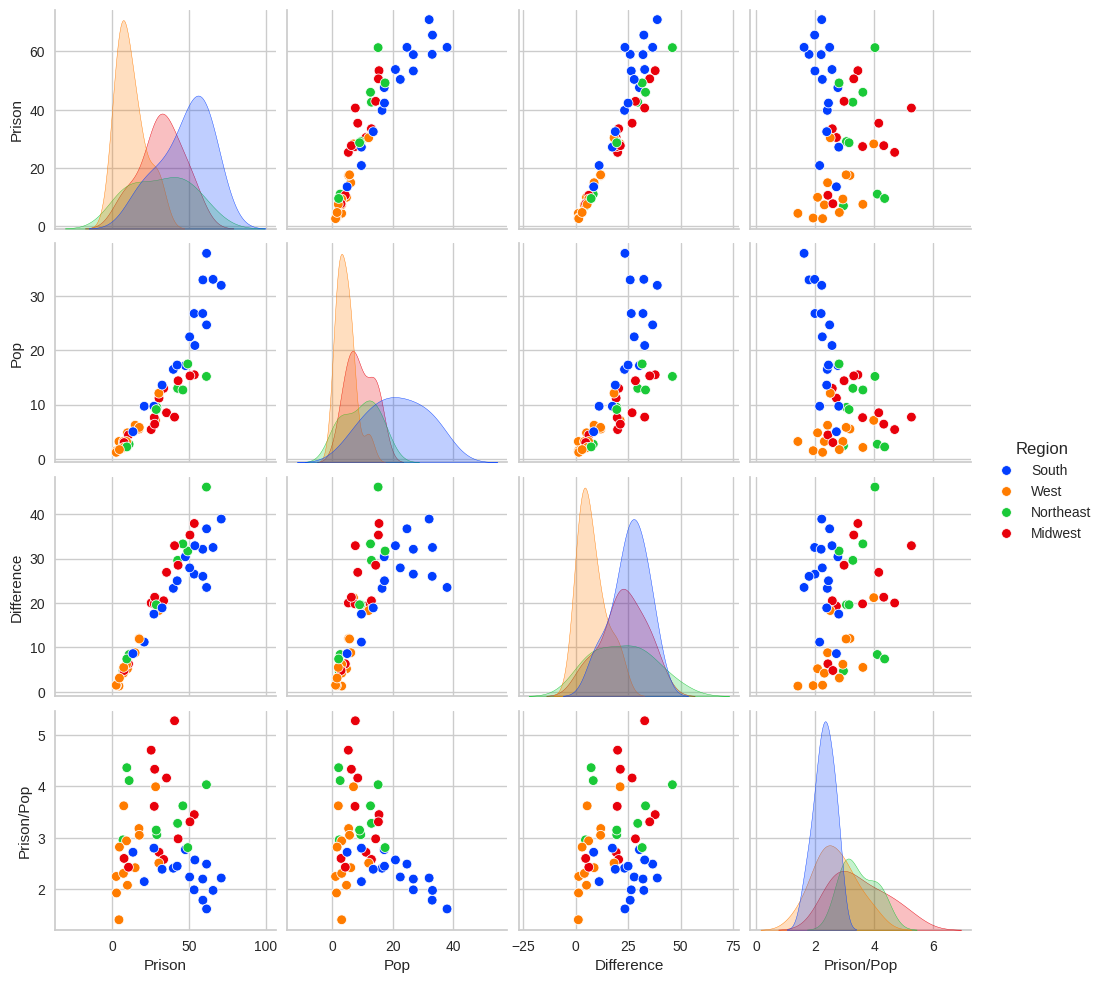

In [ ]:
sns.pairplot(aapopprison, hue="Region", palette="bright")

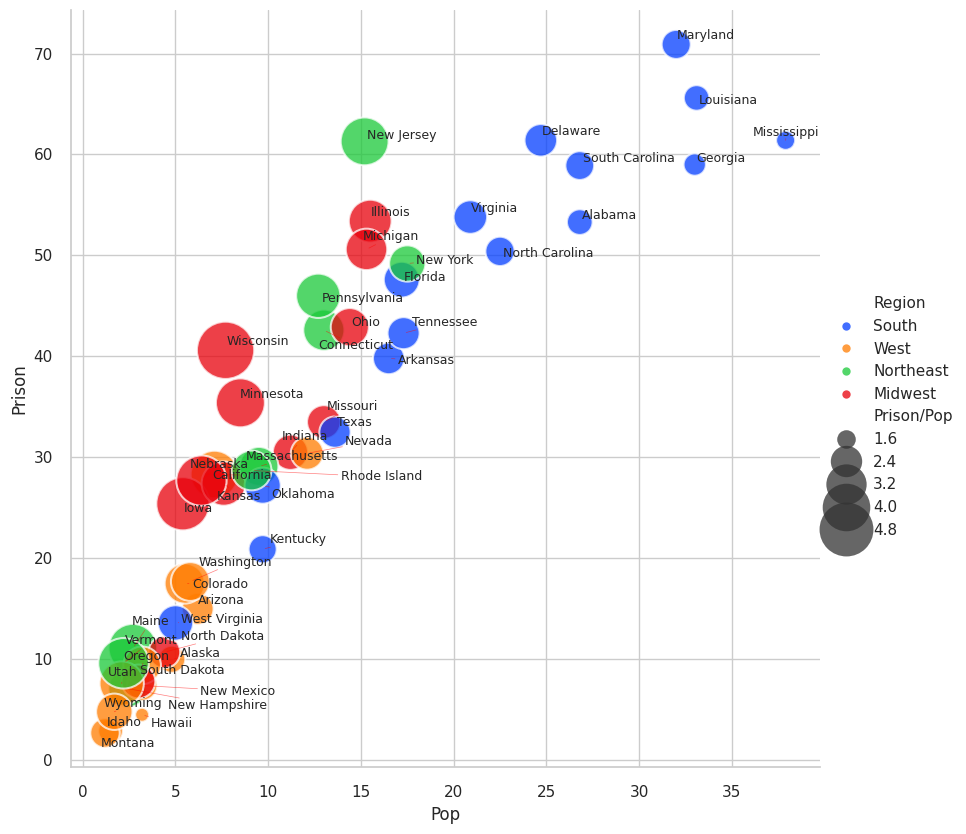

In [ ]:
# Set theme
sns.set_theme(style="whitegrid")

# Create the plot
g = sns.relplot(
    y="Prison", x="Pop",
    hue="Region", size="Prison/Pop",
    sizes=(100, 1700), alpha=0.75, palette="bright",
    height=8.5, data=aapopprison
)

# Get the axis
ax = g.ax

# Add text labels for each point
texts = [ax.text(row['Pop'], row['Prison'], row['State'], fontsize=9)
         for idx, row in aapopprison.iterrows()]

# Adjust text positions to avoid overlap
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

# Show the plot
plt.show()

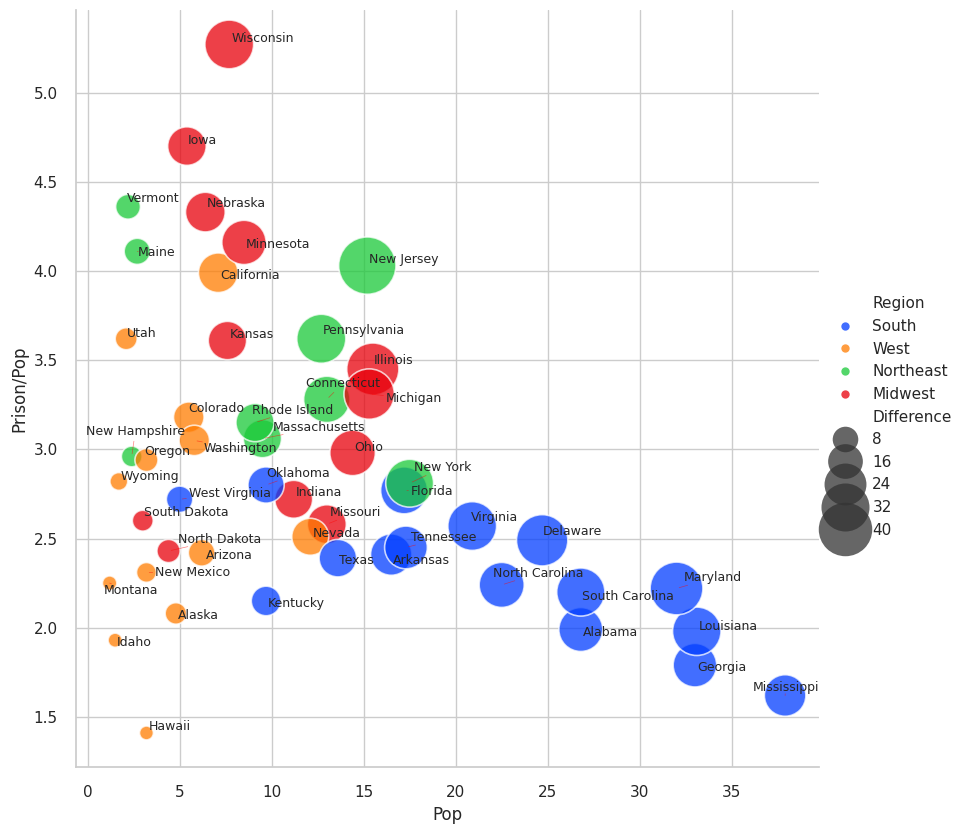

In [ ]:
# Set theme
sns.set_theme(style="whitegrid")

# Create the plot
g = sns.relplot(
    y="Prison/Pop", x="Pop",
    hue="Region", size="Difference",
    sizes=(100, 1700), alpha=0.75, palette="bright",
    height=8.5, data=aapopprison
)

# Get the axis
ax = g.ax

# Add text labels for each point
texts = [ax.text(row['Pop'], row['Prison/Pop'], row['State'], fontsize=9)
         for idx, row in aapopprison.iterrows()]

# Adjust text positions to avoid overlap
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

# Show the plot
plt.show()

In [ ]:
aapopprison[['Division','Pop', 'Prison','Difference','Prison/Pop',]].groupby('Division').agg(['mean', 'min','max','std','skew']).round(2)

Pop                          Prison                     \
                     mean   min   max    std  skew   mean   min   max    std   
Division                                                                       
East North Central  12.82   7.7  15.5   3.34 -1.12  43.60  30.5  53.4   9.03   
East South Central  22.92   9.7  37.9  12.19  0.34  44.47  20.9  61.4  17.56   
Middle Atlantic     15.13  12.7  17.5   2.40 -0.12  52.17  46.0  61.3   8.07   
Mountain             4.19   1.2  12.1   3.70  1.63  11.04   2.7  30.4   9.50   
New England          6.48   2.2  13.0   4.64  0.36  21.37   7.1  42.6  14.23   
Pacific              4.82   3.2   7.1   1.69  0.37  13.98   4.5  28.3   9.29   
South Atlantic      22.76   5.0  33.0   8.95 -1.02  51.95  13.6  70.9  17.08   
West North Central   6.90   3.0  13.0   3.27  1.02  23.99   7.8  35.4  10.70   
West South Central  18.23   9.7  33.1  10.30  1.57  41.28  27.2  65.6  17.02   

                         Difference                         Prison/Pop        \
                    skew       mean   min   max   std  skew       mean   min   
Division                                                                       
East North Central -0.56      30.78  19.3  37.9  7.29 -1.14       3.55  2.72   
East South Central -0.93      21.55  11.2  26.5  7.01 -1.82       2.05  1.62   
Middle Atlantic     1.43      37.03  31.7  46.1  7.89  1.65       3.49  2.81   
Mountain            1.36       6.85   1.4  18.3  5.89  1.17       2.63  1.93   
New England         0.50      14.88   4.7  29.6  9.62  0.56       3.49  2.96   
Pacific             1.03       9.16   1.3  21.2  7.72  1.08       2.69  1.41   
South Atlantic     -1.84      29.19   8.6  38.9  9.34 -1.72       2.38  1.79   
West North Central -0.79      17.09   4.8  26.9  8.25 -0.83       3.49  2.43   
West South Central  1.48      23.05  17.5  32.5  6.77  1.29       2.40  1.98   

                                      
                     max   std  skew  
Division                              
East North Central  5.27  1.00  1.79  
East South Central  2.45  0.35 -0.28  
Middle Atlantic     4.03  0.62 -0.92  
Mountain            3.62  0.55  0.81  
New England         4.36  0.59  0.91  
Pacific             3.99  0.99 -0.05  
South Atlantic      2.77  0.33 -0.55  
West North Central  4.70  0.95  0.02  
West South Central  2.80  0.33 -0.09

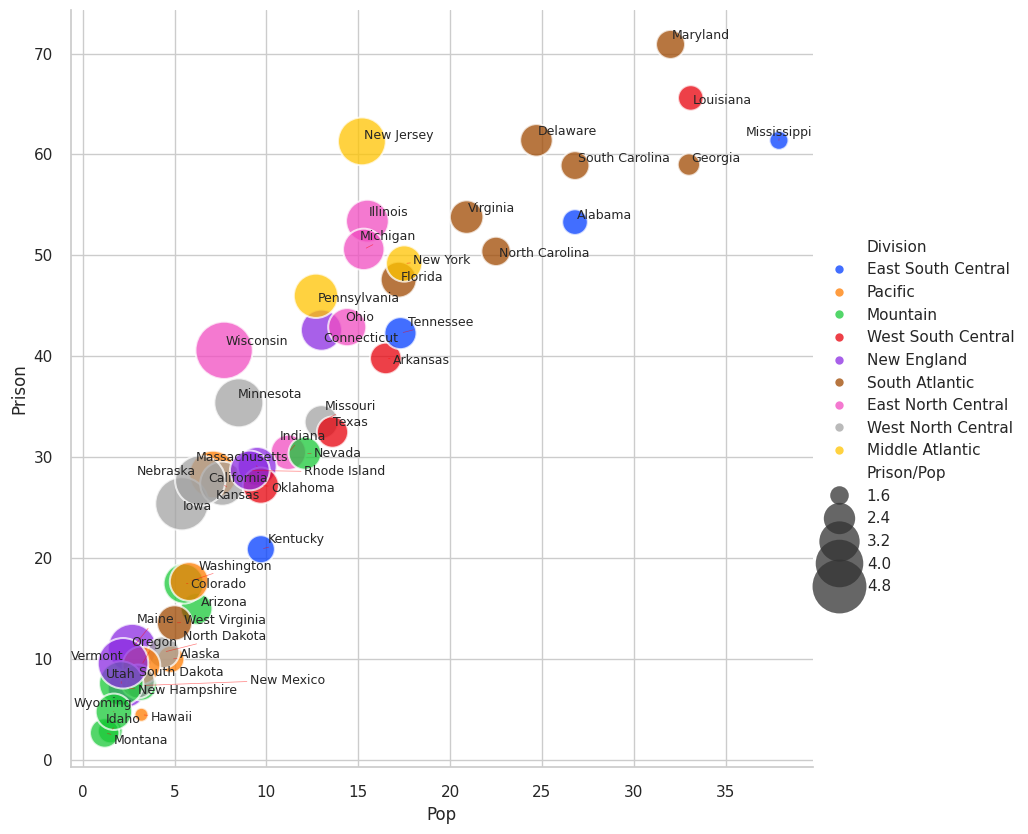

In [ ]:
# Set theme
sns.set_theme(style="whitegrid")

# Create the plot
g = sns.relplot(
    y="Prison", x="Pop",
    hue="Division", size="Prison/Pop",
    sizes=(100, 1700), alpha=0.75, palette="bright",
    height=8.5, data=aapopprison
)

# Get the axis
ax = g.ax

# Add text labels for each point
texts = [ax.text(row['Pop'], row['Prison'], row['State'], fontsize=9)
         for idx, row in aapopprison.iterrows()]

# Adjust text positions to avoid overlap
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

# Show the plot
plt.show()

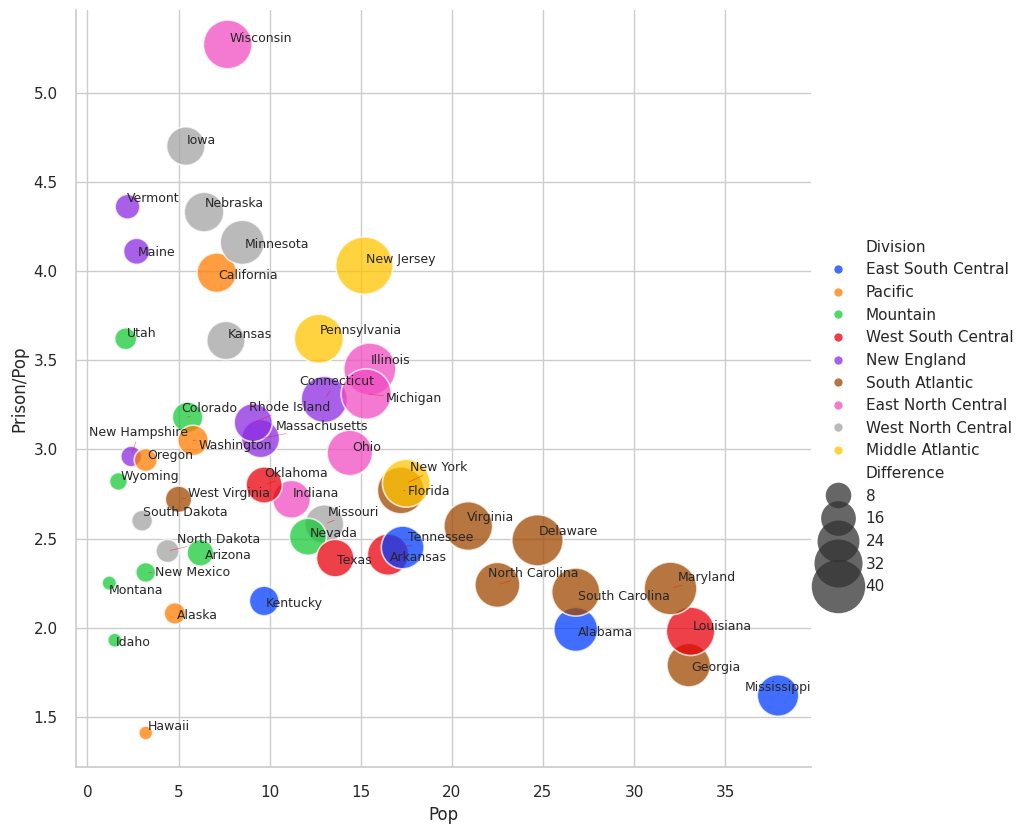

In [ ]:
# Set theme
sns.set_theme(style="whitegrid")

# Create the plot
g = sns.relplot(
    y="Prison/Pop", x="Pop",
    hue="Division", size="Difference",
    sizes=(100, 1700), alpha=0.75, palette="bright",
    height=8.5, data=aapopprison
)

# Get the axis
ax = g.ax

# Add text labels for each point
texts = [ax.text(row['Pop'], row['Prison/Pop'], row['State'], fontsize=9)
         for idx, row in aapopprison.iterrows()]

# Adjust text positions to avoid overlap
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

# Show the plot
plt.show()

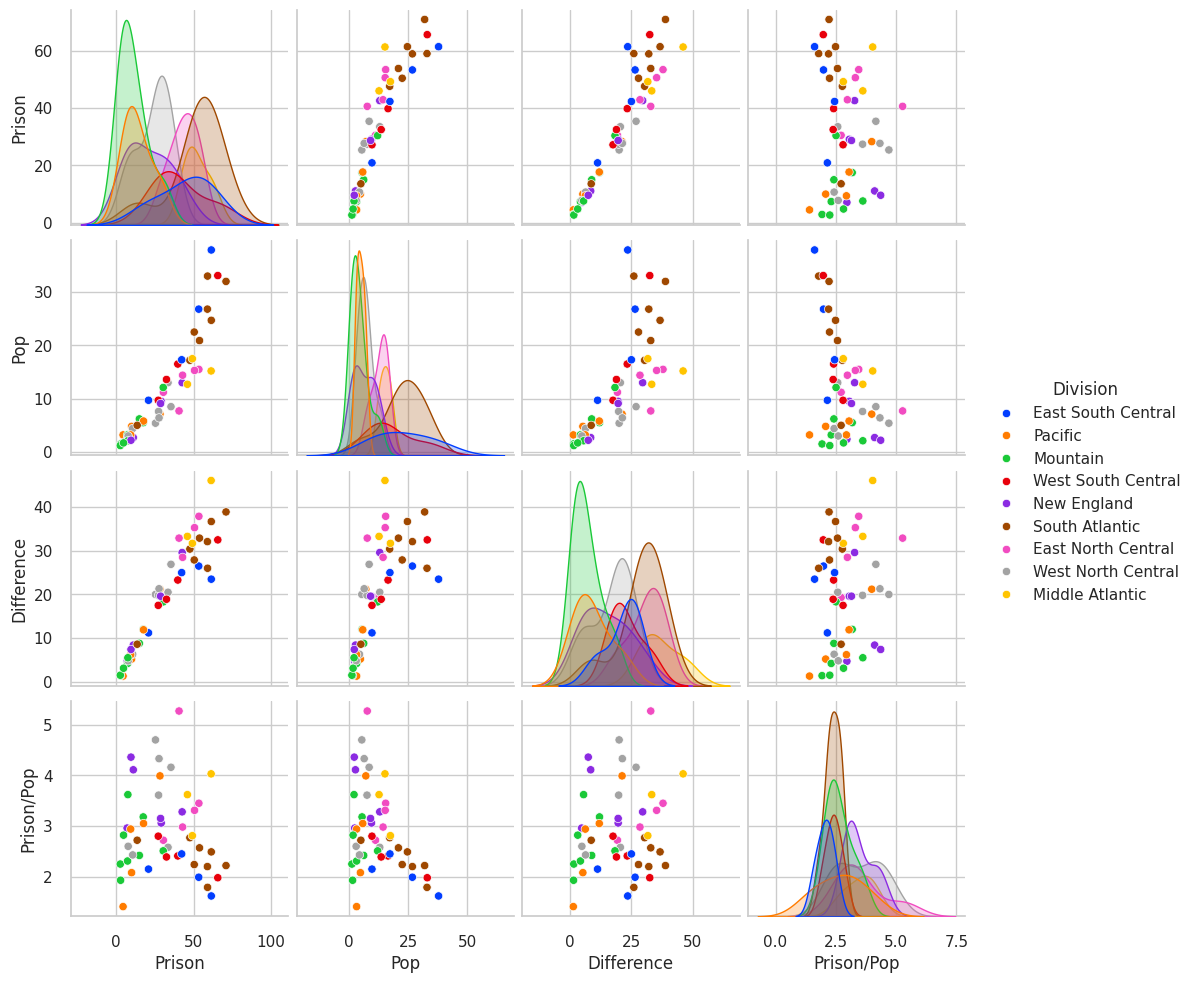

In [ ]:
sns.pairplot(aapopprison, hue="Division", palette="bright")

### Mapping African American Population and Prison Percentage

In [ ]:
! wget -q -O US.zip https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

zip_ref = zipfile.ZipFile('US.zip', 'r'); zip_ref.extractall(); zip_ref.close()

In [ ]:
US=gpd.read_file('/content/cb_2018_us_state_500k.shp')

In [ ]:
# I have used this file bewfore. I am renaming the Name column for merge
US = US.rename(columns={'NAME':'State'})

In [ ]:
US.dtypes

,0
STATEFP,object
STATENS,object
AFFGEOID,object
GEOID,object
STUSPS,object
State,object
LSAD,object
ALAND,int64
AWATER,int64
geometry,geometry


In [ ]:
#I am going to merge US with aapopprison on state
aapopprisonmap = pd.merge(US, aapopprison, on='State', how='outer',indicator='indicator_column') # Change indicator=True to indicator='indicator_column'
aapopprisonmap.dtypes

,0
STATEFP,object
STATENS,object
AFFGEOID,object
GEOID,object
STUSPS,object
State,object
LSAD,object
ALAND,int64
AWATER,int64
geometry,geometry


In [ ]:
#I want to look at the details in my _merge field
aapopprisonmap['_merge'].value_counts()

,count
_merge,
both,50
left_only,0
right_only,0


In [ ]:
#I want to know the values in the state field aapopprisonmap of the _merge firls that are right_only
#This makes sense. While there is some data for Black population, it's not in the prison set, and most of these have small populations and aren't states.
aapopprisonmap[aapopprisonmap['_merge'] == 'right_only']['State'].unique()

array([], dtype=object)

In [ ]:
#I want to know the values in the state field aapopprisonmap of the _merge firls that are left_only
#This makes sense.
aapopprisonmap[aapopprisonmap['_merge'] == 'left_only']['State'].unique()

array([], dtype=object)

In [ ]:
#I only want to look at states, not territories.
#I removed HI and AK, but if I do this for further study. I can't remove them, but the map looks off when I include them.
#I also had to remove DC because my prison data didn't have prison data for DC.
aapopprisonstates = aapopprisonmap[~aapopprisonmap['State'].isin(['Alaska','District of Columbia','Hawaii','Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]

In [ ]:
#In aapopprisonstates I want to know which State values are empty in Prison/Pop Category
aapopprisonstates[aapopprisonstates['Prison/Pop Category'].isna()]['State'].unique()

array([], dtype=object)

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



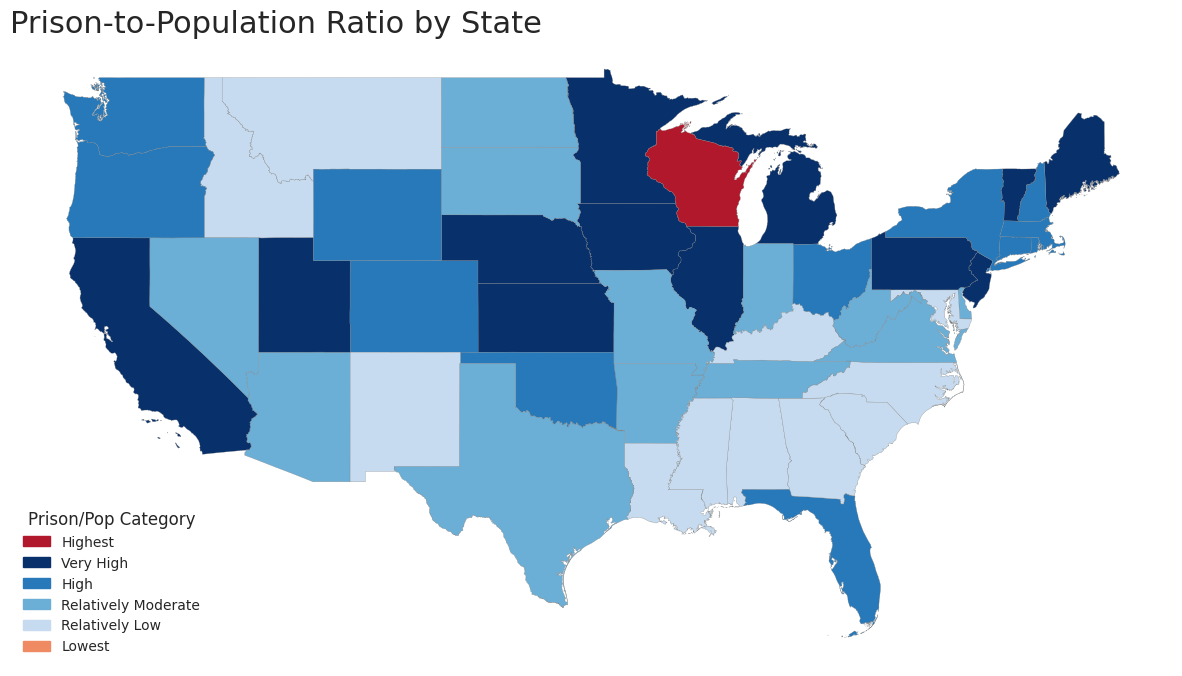

In [ ]:
category_colors = {
    "Highest": "#b2182b",  # Dark Red
    "Very High": "#08306b",  # Darkest Blue
    "High": "#2879b9",       # Medium-Dark Blue
    "Relatively Moderate": "#6baed6",  # Medium-Light Blue
    "Relatively Low": "#c6dbef",        # Lightest Blue
    "Lowest": "#ef8a62"  # Light Red
}

# Create the 'Category Color' column based on the 'Prison/Pop Category' column
# before attempting to plot. This maps the categories to their respective color codes.
aapopprisonstates['Prison/Pop Category Color'] = aapopprisonstates['Prison/Pop Category'].map(category_colors)

fig, ax = plt.subplots(1, 1, figsize=(15, 50))

aapopprisonstates.plot(ax=ax,
                       color=aapopprisonstates['Prison/Pop Category Color'],
                       edgecolor='grey', linewidth=0.2, legend=False)

ax.set_title("Prison-to-Population Ratio by State", loc='left', fontsize=22)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in category_colors.items()]
ax.legend(handles=legend_patches, title="Prison/Pop Category", loc='lower left', fontsize=10)

plt.show()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



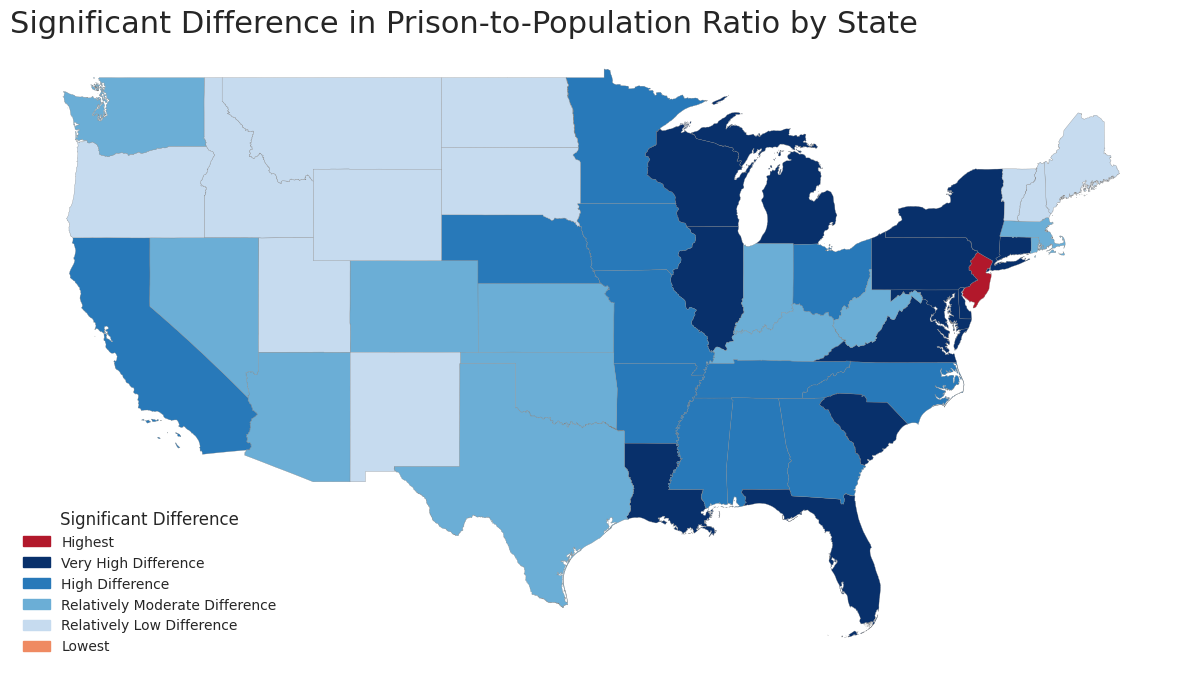

In [ ]:
category_colors = {
    "Highest": "#b2182b",  # Dark Red
    "Very High Difference": "#08306b",  # Darkest Blue
    "High Difference": "#2879b9",       # Medium-Dark Blue
    "Relatively Moderate Difference": "#6baed6",  # Medium-Light Blue
    "Relatively Low Difference": "#c6dbef",        # Lightest Blue
    "Lowest": "#ef8a62"  # Light Red

}

# Rename 'Category Color' column to 'Significant Difference Color' for clarity
aapopprisonstates['Significant Difference Color'] = aapopprisonstates['Significant Difference'].map(category_colors)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

aapopprisonstates.plot(ax=ax,
                       color=aapopprisonstates['Significant Difference Color'],
                       edgecolor='grey', linewidth=0.2, legend=False)

ax.set_title("Significant Difference in Prison-to-Population Ratio by State", loc='left', fontsize=22)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in category_colors.items()]
ax.legend(handles=legend_patches, title="Significant Difference", loc='lower left', fontsize=10)

plt.show()

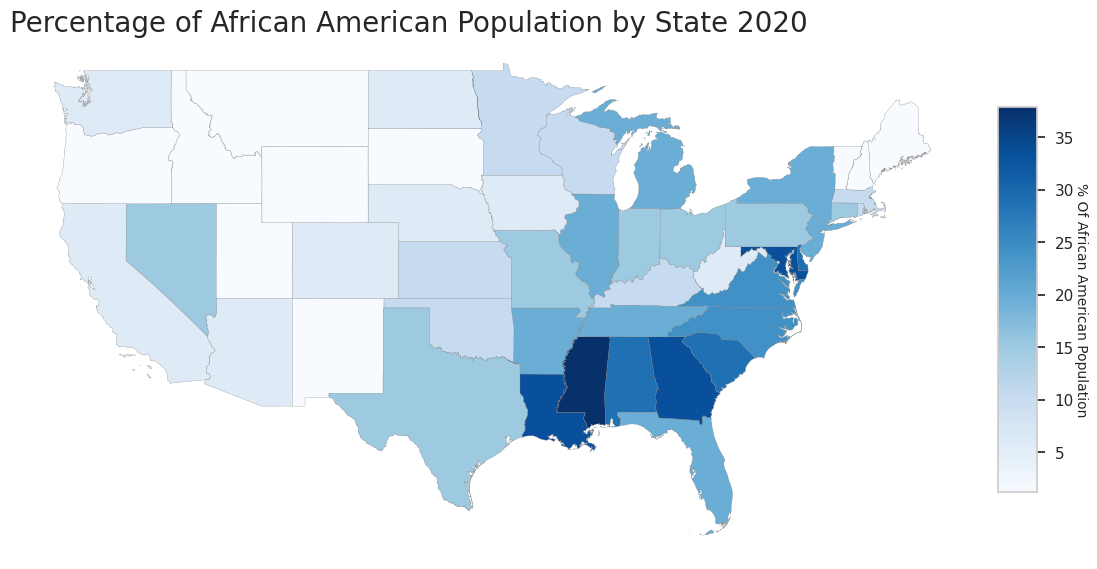

In [ ]:
#Cmap colors https://matplotlib.org/stable/users/explain/colors/colormaps.html
#If I work on this for my dissertation, I want to disaggregate by county or census tract, like https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.michiganpublic.org%2Farts-culture%2F2011-09-29%2Fcensus-releases-numbers-on-the-black-population-in-the-u-s&psig=AOvVaw25X0PrUe_N2YZnxSvt3h95&ust=1739758551515000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCPiQgp6Qx4sDFQAAAAAdAAAAABAE
fig, ax = plt.subplots(1, figsize=(15, 50))

aapopprisonstates.plot(ax=ax, column='Pop', cmap='Blues',
                       scheme='natural_breaks', k=9, edgecolor='grey',
                       linewidth=.2, legend=False)
ax.set_title("Percentage of African American Population by State 2020",
             loc='left', fontsize=20)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

sm = mpl.cm.ScalarMappable(cmap='Blues', norm=mpl.colors.Normalize(
    vmin=aapopprisonstates['Pop'].min(), vmax=aapopprisonstates['Pop'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, aspect=10, shrink=0.10)
cbar.set_label("% Of African American Population", fontsize=10)
cbar.set_label("% Of African American Population", fontsize=10, rotation=270, labelpad=10)

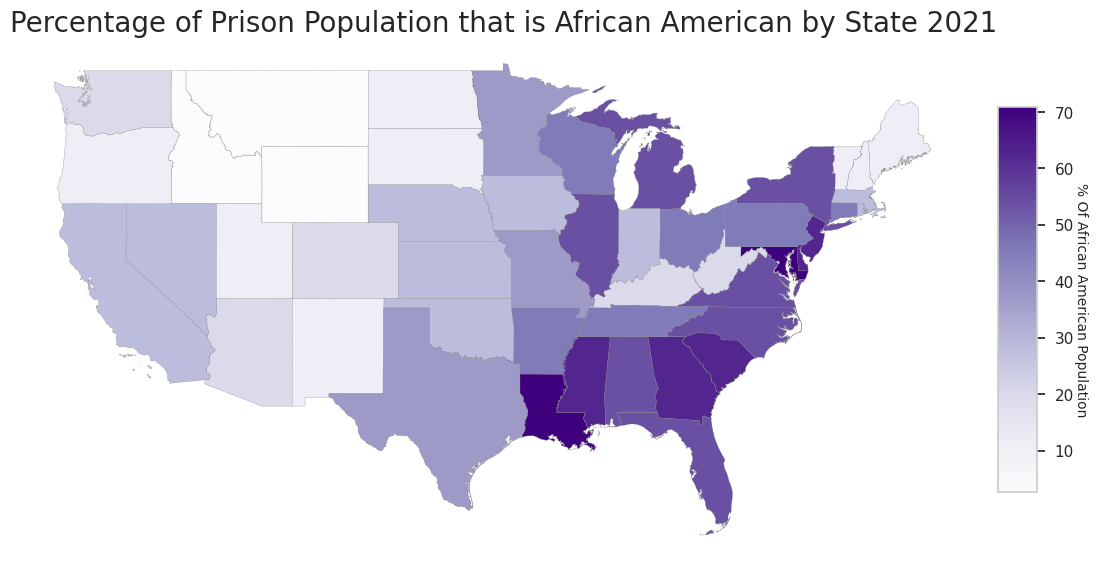

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 50))

aapopprisonstates.plot(ax=ax, column='Prison', cmap='Purples',
                       scheme='natural_breaks', k=9, edgecolor='grey',
                       linewidth=.2, legend=False)
ax.set_title("Percentage of Prison Population that is African American by State 2021",
             loc='left', fontsize=20)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

sm = mpl.cm.ScalarMappable(cmap='Purples', norm=mpl.colors.Normalize(
    vmin=aapopprisonstates['Prison'].min(), vmax=aapopprisonstates['Prison'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, aspect=10, shrink=0.10)
cbar.set_label("% Of African American Population", fontsize=10)
cbar.set_label("% Of African American Population", fontsize=10, rotation=270, labelpad=10)

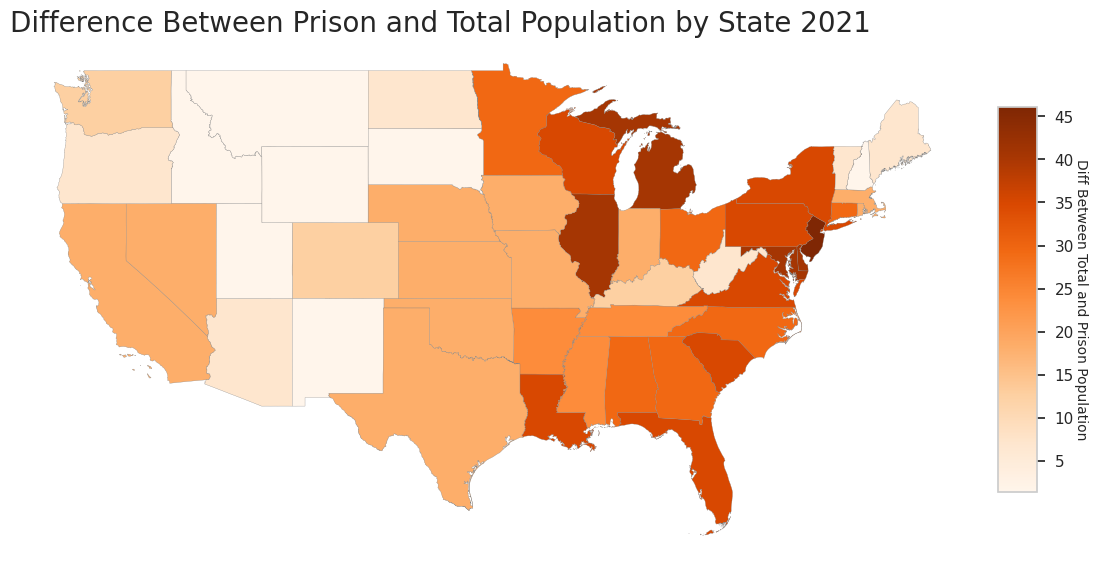

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 50))

aapopprisonstates.plot(ax=ax, column='Difference', cmap='Oranges',
                       scheme='natural_breaks', k=9, edgecolor='grey',
                       linewidth=.2, legend=False)
ax.set_title("Difference Between Prison and Total Population by State 2021",
             loc='left', fontsize=20)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

sm = mpl.cm.ScalarMappable(cmap='Oranges', norm=mpl.colors.Normalize(
    vmin=aapopprisonstates['Difference'].min(), vmax=aapopprisonstates['Difference'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, aspect=10, shrink=0.10)
cbar.set_label("Diff Between Total and Prison Population", fontsize=10)
cbar.set_label("Diff Between Total and Prison Population", fontsize=10, rotation=270, labelpad=10)

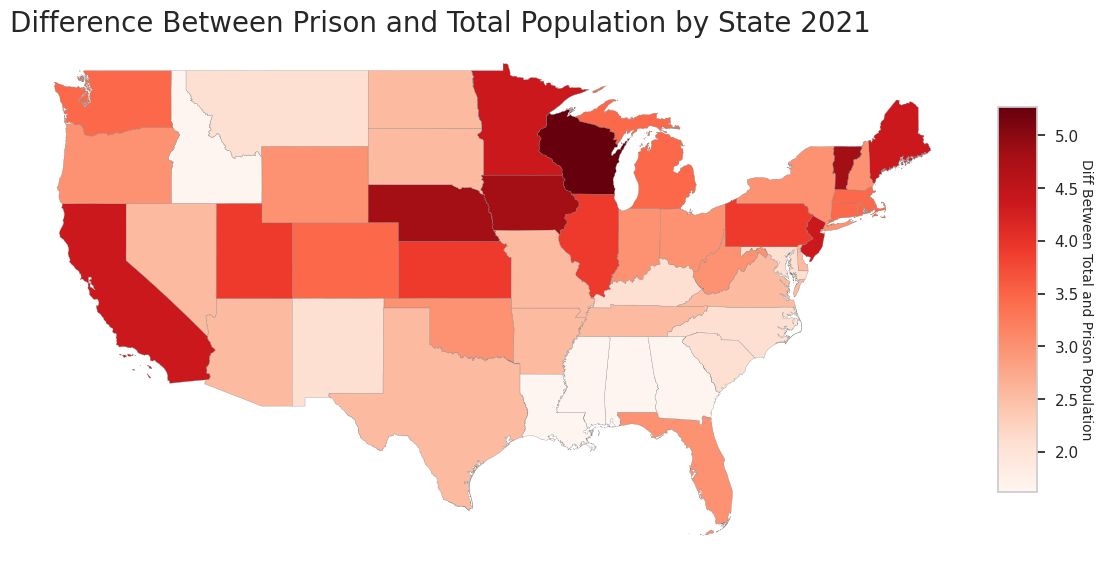

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 50))

aapopprisonstates.plot(ax=ax, column='Prison/Pop', cmap='Reds',
                       scheme='natural_breaks', k=9, edgecolor='grey',
                       linewidth=.2, legend=False)
ax.set_title("Difference Between Prison and Total Population by State 2021",
             loc='left', fontsize=20)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

sm = mpl.cm.ScalarMappable(cmap='Reds', norm=mpl.colors.Normalize(
    vmin=aapopprisonstates['Prison/Pop'].min(), vmax=aapopprisonstates['Prison/Pop'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, aspect=10, shrink=0.10)
cbar.set_label("Diff Between Total and Prison Population", fontsize=10)
cbar.set_label("Diff Between Total and Prison Population", fontsize=10, rotation=270, labelpad=10)